<a href="https://colab.research.google.com/github/jaswanthmathan/project/blob/main/JASWANTH_DAY30_DIY_SOLUTION_DOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Chi-Square Test
The “titanic.csv” dataset has details of passengers on board the Titanic when it
met its fate in 1912. Your job is to compare how Passenger class affects the
probability of survival with the help of the Chi-Square test. Load the “titanic.csv“
data into a DataFrame and perform the following tasks:
1. Create a DataFrame with three columns from the original dataset –
"PassengerID," "PClass," "Survived or not"
2. Visualize the "PClass" and the "Survived or not" columns to get an overview
of the columns
3. Plot the correlation between passenger class and chances of survival and
calculate the survival rate for each class
4. State Null hypothesis based on the class-wise survival rate
5. Plot the difference between expected and observed correlations between
passenger class and survival using heat maps to decide if there is a need for
a Chi-Square Test
6. Calculate Chi-Square and P – Values for each passenger class and the entire
distribution
7. Accept or reject the Null hypothesis based on the results obtained

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
"""1. Create a DataFrame with three columns from the original dataset –
"PassengerID," "PClass," "Survived or not"
"""

data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId',usecols=['PassengerId','Pclass','Survived'])
data

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [11]:
"""2. Visualize the "PClass" and the "Survived or not" columns to get an overview
of the columns
"""

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
dtypes: int64(2)
memory usage: 20.9 KB


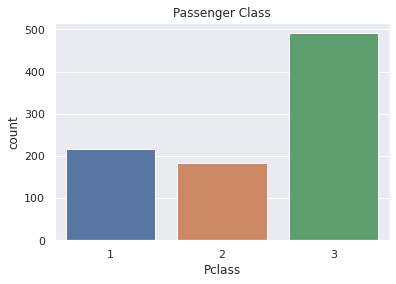

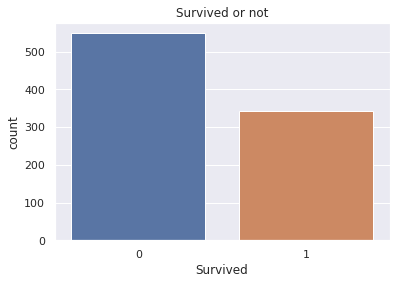

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.countplot(x="Pclass", data=data)
plt.title('Passenger Class')
plt.show()

sns.set(style="darkgrid")
sns.countplot(x="Survived", data=data)
plt.title('Survived or not')
plt.show()



In [13]:
PClass_survd=pd.pivot_table(data,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

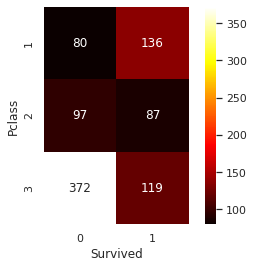

In [14]:
sns.heatmap(PClass_survd,annot=True,fmt='2g',square=True,cmap='hot')


In [15]:
"""3. Plotting the correlation between passenger class and chances of survival and
Calculating the survival rate for each clas

"""

pct_class=PClass_survd.sum(axis=1)/891
pct_class



Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [16]:
pct_survived=PClass_survd.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

In [17]:
"""4. State Null hypothesis based on the class-wise survival rate




We can see that there is 24% of total passenger in class 1, 20.65% of total passengerv in class 2 and remainung 55.11% in class 3.
Also 61.62% of total passenger survived.



Null hypothesis is :The survivewl does not depond on the class the passenger were travilling

"""
pct_class.to_frame()@(pct_survived.to_frame().T)

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [18]:
exp=round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


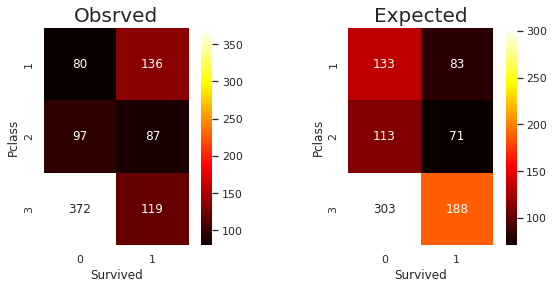

In [19]:
"""5. Plot the difference between expected and observed correlations between
passenger class and survival using heat maps to decide if there is a need for a
Chi-Square Test
"""

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(PClass_survd,annot=True,fmt='g',square=True,cmap='hot')
plt.title('Obsrved',fontsize=20)

plt.subplot(1,2,2)
sns.heatmap(exp,annot=True,fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)

plt.show()

In [20]:
"""6. Calculate Chi-Square and P – Values for each passenger class and the entire
distribution
"""

Chi_table=((PClass_survd-exp)**2)/exp
Chi_table

Survived,0,1
Pclass,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


In [21]:
from scipy.stats.distributions import chi2
Chi_value=Chi_table.sum().sum()
p_value=chi2.sf(Chi_value,1)
print('Chi square value is',Chi_value)
print('P value is',p_value)

Chi square value is 101.87213414657131
P value is 5.9223796800860216e-24


In [22]:
from scipy import stats
chi2_stat,p_val,dof,ex=stats.chi2_contingency(PClass_survd)
print('Chi square value is',chi2_stat)
print('P Value is',p_val)
print('Degrees of Freedom:',dof)

Chi square value is 102.88898875696056
P Value is 4.549251711298793e-23
Degrees of Freedom: 2
